# How well do statistics play in discerning the final teams in the NCAA Championship?

To millions of Americans, March is the most important month of the year, not just because of the changing season, but because it hosts the NCAA Division I Men's Basketball Tournament. It has earned the legendary nickname "March Madness" for good reason. Each year, 68 teams are selected from approximately 350 Division I programs to battle in a single-elimination format. The selection process, which determines which teams get into the bracket and where they are seeded, is heavily reliant on statistics such as win-loss records, Strength of Schedule (SOS), and conference championship performance. The objective of the tournament is simple: win all your games to be crowned the national champion.

This raises a crucial question for analysts and fans alike: How effectively do statistical metrics and predictive models truly play in discerning the final teams that reach the later rounds, especially when compared to the chaotic nature of the tournament itself?

In this project, I will be conducting analysis to find answers to following questions:
* The 2025 season had a Final Four round consisting entirely of #1 seeds. What specific factors can be seen as trends in those teams that led to success?
* How common is it for #1 seeds to show up in the Final Four? Elite Eight?
* What is the most common position for different seeds to end the season at?


Amazing reference from this github: https://github.com/Skye80/Data-Analysis-Portfolio/blob/master/Analysis%20of%20Credibly%20Accused%20Clergy%20Data.ipynb

In [115]:
#reading in data
import pandas as pd 
import numpy as np
from scipy import stats
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns


# TEAM - The Division I college basketball school
# CONF - The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)
# G - Number of games played
# W - Number of games won
# ADJOE - Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)
# ADJDE - Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)
# BARTHAG - Power Rating (Chance of beating an average Division I team)
# EFG_O - Effective Field Goal Percentage Shot
# EFG_D - Effective Field Goal Percentage Allowed
# TOR - Turnover Percentage Allowed (Turnover Rate)
# TORD - Turnover Percentage Committed (Steal Rate)
# ORB - Offensive Rebound Rate
# DRB - Offensive Rebound Rate Allowed
# FTR - Free Throw Rate (How often the given team shoots Free Throws)
# FTRD - Free Throw Rate Allowed
# 2P_O - Two-Point Shooting Percentage
# 2P_D - Two-Point Shooting Percentage Allowed
# 3P_O - Three-Point Shooting Percentage
# 3P_D - Three-Point Shooting Percentage Allowed
# ADJ_T - ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)
# WAB - Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)
# POSTSEASON - Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)
# SEED - Seed in the NCAA March Madness Tournament



df_all_years = pd.read_csv('cbb.csv')
df_2025 = pd.read_csv('cbb25.csv')
df_2024 = pd.read_csv('cbb24.csv')

In [116]:
# First five rows of the main df_all_years data set
df_all_years.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,Houston,B12,34,30,119.2,85.5,0.9785,49.7,44.0,13.7,...,39.0,48.4,43.4,34.7,30.0,63.3,10.6,S16,1.0,2024
1,Connecticut,BE,34,31,127.1,93.6,0.9712,57.1,45.1,14.9,...,32.5,58.5,43.7,36.7,31.9,64.6,11.3,Champions,1.0,2024
2,Purdue,B10,33,29,126.2,94.7,0.9644,56.0,47.7,16.5,...,23.0,53.2,48.1,40.8,31.4,67.6,11.0,2ND,1.0,2024
3,North Carolina,ACC,34,27,116.8,93.2,0.9305,51.3,46.4,14.4,...,28.3,50.3,46.0,35.4,31.4,70.4,6.6,S16,1.0,2024
4,Iowa St.,B12,34,27,113.6,86.5,0.9583,51.9,47.1,15.7,...,35.2,51.7,46.9,34.9,31.5,67.6,6.9,S16,2.0,2024


In [117]:
# Last five rows of the main df_all_years data set
df_all_years.tail()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
3880,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
3881,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
3882,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
3883,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013
3884,Florida Gulf Coast,ASun,35,24,103.4,96.3,0.6952,51.6,46.9,21.0,...,32.7,52.3,46.9,33.4,31.3,69.1,-4.0,S16,15.0,2013


In [118]:
# Description of the dataset
df_all_years.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,...,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,748.000000,3885.000000
mean,30.531532,16.075418,103.339743,103.341519,0.493928,49.935856,50.125946,18.551223,18.483115,29.267310,...,34.384813,34.645766,49.224402,49.388880,34.141133,34.319614,67.712227,-7.639967,8.798128,2018.403604
std,3.809623,6.506570,7.315009,6.490684,0.255374,3.079803,2.855079,2.145057,2.289045,4.201366,...,5.465945,6.337450,3.416380,3.290915,2.713812,2.406306,3.037251,6.826502,4.671615,3.583747
min,5.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,14.400000,...,19.600000,16.200000,37.700000,37.700000,24.700000,26.100000,57.200000,-25.200000,1.000000,2013.000000
25%,29.000000,11.000000,98.300000,98.600000,0.281200,47.900000,48.200000,17.100000,16.900000,26.500000,...,30.500000,30.100000,46.900000,47.200000,32.300000,32.700000,65.700000,-12.600000,5.000000,2015.000000
50%,31.000000,16.000000,103.000000,103.500000,0.474000,49.900000,50.100000,18.500000,18.400000,29.300000,...,34.200000,34.000000,49.200000,49.400000,34.100000,34.300000,67.600000,-8.100000,9.000000,2018.000000
75%,33.000000,21.000000,108.100000,108.000000,0.716400,52.000000,52.000000,19.900000,19.900000,32.000000,...,38.000000,38.600000,51.400000,51.700000,35.900000,35.900000,69.700000,-3.000000,13.000000,2022.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,61.000000,60.100000,27.100000,28.500000,43.600000,...,58.600000,60.700000,64.000000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2024.000000


In [119]:
# Cleaninng up the NULL values
# Values from the SEED column that are NULL will be converted to "0"
# Values from the POSTSEASON column that are NULL will be converted to "No Tourn"
# Values from the YEAR column will be trated as categorical values as numerical values will skew analysis.

df_all_years['YEAR'] = df_all_years['YEAR'].astype(str)



df_all_years = df_all_years.fillna({"POSTSEASON": "No Tourn", "SEED" : 0})

df_2025 = df_2025.fillna({"POSTSEASON": "No Tourn","SEED" : 0})
df_2024 = df_2024.fillna({"POSTSEASON": "No Tourn", "SEED" : 0})



df_all_years['POSTSEASON'] = df_all_years['POSTSEASON'].replace('N/A', 'No Tourn')
df_2025['SEED'] = df_2025['SEED'].replace('N/A', 'No Tourn')
df_2024['SEED'] = df_2024['SEED'].replace('N/A', 'No Tourn')

df_all_years['SEED'] = df_all_years['SEED'].astype(int)
df_2025['SEED'] = df_2025['SEED'].astype(int)
df_2024['SEED'] = df_2024['SEED'].astype(int)







# Analysis Introduction: The Elite Four and the 2025 Season

The 2025 NCAA Tournament presented a highly unusual outcome, with all four number 1 seeds advancing to the Final Four (Houston, Duke, Auburn, Florida). While elite teams are expected to perform well, this level of dominance necessitates a deeper look into the underlying statistics. This analysis seeks to move beyond simple win/loss records and identify the statistical traits that uniquely characterized this dominant group of four teams and differentiated them from the rest of the tournament field. By isolating their key statistical advantages, we aim to uncover the factors that drove their unprecedented run of success.

## A. Was Effective Field Goal Percentage or Turnover Rate a more significant differentiating factor?

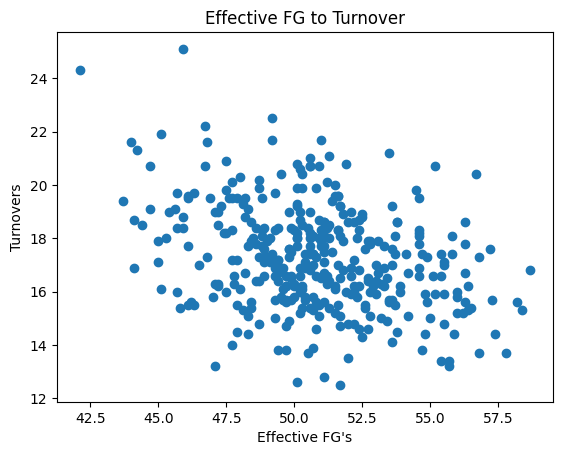

In [120]:
x1 = df_2025["EFG_O"].to_numpy()

y1 = df_2025["TOR"].to_numpy()

plt.scatter(x1, y1)
plt.title("Effective FG to Turnover")
plt.xlabel("Effective FG's")
plt.ylabel("Turnovers")
plt.show()

This scatter plot illustrates the relationship between Effective Field Goal Percentage (EFG_O) and Turnover Rate (TOR), showing a predictable inverse correlation across the tournament field. Teams with a higher turnover rate (TOR) typically exhibit lower offensive effectiveness (EFG_O), as they surrender scoring possessions. Conversely, teams with a lower turnover rate are generally more effective because they maximize their opportunities to score.

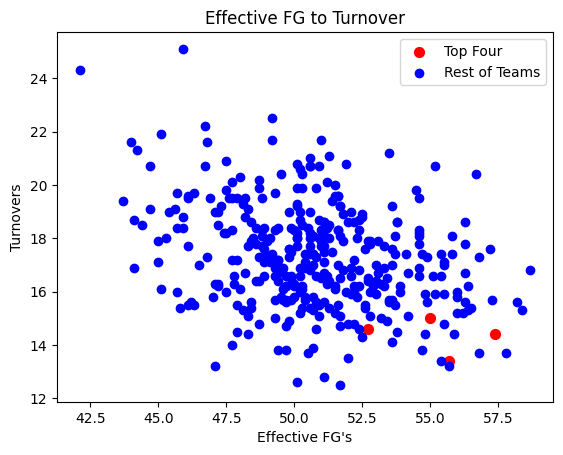

In [121]:
top_four = df_2025.head(4).copy()
rest = df_2025[4::].copy()

x1 = top_four["EFG_O"].to_numpy()
x2 = rest["EFG_O"].to_numpy()

y1 = top_four["TOR"].to_numpy()
y2 = rest["TOR"].to_numpy()

plt.scatter(x1, y1, color='red', s=50,label='Top 4')
plt.scatter(x2, y2, color='blue', label='Rest')

plt.legend(labels=['Top Four', 'Rest of Teams'])
plt.title("Effective FG to Turnover")
plt.xlabel("Effective FG's")
plt.ylabel("Turnovers")
plt.show()



The visual evidence from the scatter plot provides a definitive answer to the question of whether (EFG_O) or (TOR) was the greater differentiator: it was the successful synergy of both.The four elite teams clustered strongly in the bottom-right quadrant, revealing they possess a unique statistical profile that breaks the typical offensive trade-off observed across the rest of the tournament field. Unlike other teams, which may excel in one area while sacrificing the other, the four elite teams achieved excellence in both: high Effective Field Goal Percentage (EFG_O) combined with low Turnover Rate (TOR).

In [122]:
# Calculating the difference in means and performing a t-test to see if the top four teams are statistically different from the rest of the teams in terms of EFG_O and TOR

# Calculate top four teams means
top_efg_mean = top_four["EFG_O"].mean()
top_tor_mean = top_four["TOR"].mean()

# Calculate trest of teams means
rest_efg_mean = rest["EFG_O"].mean()
rest_tor_mean = rest["TOR"].mean()

# Calculating the difference in means
efg_difference = top_efg_mean - rest_efg_mean
tor_difference = rest_tor_mean - top_tor_mean # Note: For TOR, a lower value is better, so we reverse the subtraction

print(f"Difference in EFG_O means: {efg_difference}")
print(f"Difference in TOR means: {tor_difference}") 



Difference in EFG_O means: 4.457499999999996
Difference in TOR means: 2.9766666666666683


In [123]:
# Performing t-tests for EFG_O

efg_t_statistic, efg_p_value = stats.ttest_ind( top_four["EFG_O"], rest["EFG_O"], equal_var=True)

print(f"EFG T-statistic: {efg_t_statistic}")
print(f"EFG P-value: {efg_p_value}")


# Interpretation (example with a significance level of 0.05)
alpha = 0.05
if efg_p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the sample means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the sample means.")

EFG T-statistic: 2.971324595664729
EFG P-value: 0.003163283600846579
Reject the null hypothesis: There is a significant difference between the sample means.


In [124]:
# Performing t-tests for TOR

tor_t_statistic, tor_p_value = stats.ttest_ind( top_four["TOR"], rest["TOR"], equal_var=True)

print(f"TOR T-statistic: {tor_t_statistic}")
print(f"TOR P-value: {tor_p_value}")


# Interpretation (example with a significance level of 0.05)
alpha = 0.05
if tor_p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the sample means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the sample means.")

TOR T-statistic: -3.0476062588955464
TOR P-value: 0.002476166303049771
Reject the null hypothesis: There is a significant difference between the sample means.


The t-tests conclusively confirm the visual evidence from the scatter plot. With a p-value of $0.00316$ for EFG_O and a $p$-value of $0.00247$ for TOR, the Null Hypothesis of equal means is rejected for both variables. The four elite teams are statistically different from the rest of the tournament field in both metrics. This proves that their unprecedented success was driven not by superiority in a single dimension, but by the synergistic advantage of being significantly more efficient on offense (higher EFG_O) while simultaneously being significantly more secure with the ball (lowerTOR)."

# B. "Not quite my tempo" - Do top teams play faster or slower than less successful teams?

The Adjusted Tempo (ADJ_T) metric—which measures the estimated number of possessions per $40$ minutes—is a fundamental measure of basketball strategy, influencing everything from shot selection to substitution patterns. In a highly competitive environment like the NCAA Tournament, an elite team's control over tempo is often a weapon, forcing opponents out of their comfort zone or dictating a pace that maximizes their statistical advantages. This analysis seeks to answer a critical strategic question following the highly unusual 2025 season: Did the four most successful teams in the tournament exhibit a unified style of play, favoring a pace significantly faster or slower than the average team in the field? By comparing the ADJ_T distribution of the four elite teams to the rest of the competitive field, we aim to determine if a deliberate, controlled tempo was a shared characteristic that underpinned their unprecedented dominance.

In [125]:
# re-defining variables for ADJ_T analysis
top_four = df_2025.head(4).copy()
rest = df_2025[4::].copy()

# Mean for all 2025 teams is 67.19 with a minimum of 58.6 and a maximum of 74.6
df_2025["ADJ_T"].describe()

count    364.000000
mean      67.193681
std        2.445514
min       58.600000
25%       65.575000
50%       67.200000
75%       68.800000
max       74.600000
Name: ADJ_T, dtype: float64

In [126]:
# Mean for the top four teams is 66.75 with a minimum of 61.4 and a maximum of 69.5
top_four['ADJ_T'].describe()


count     4.000000
mean     66.100000
std       3.497618
min      61.400000
25%      64.625000
50%      66.750000
75%      68.225000
max      69.500000
Name: ADJ_T, dtype: float64

In [127]:
# Mean for the rest of the teams is 67.2 with a minimum of 60.1 and a maximum of 74.6
rest['ADJ_T'].describe()

count    360.000000
mean      67.205833
std        2.435461
min       58.600000
25%       65.575000
50%       67.200000
75%       68.800000
max       74.600000
Name: ADJ_T, dtype: float64

C:\Users\jn080328\AppData\Local\Temp\ipykernel_49416\1405917678.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(d, vert = True, patch_artist = True, labels = ['Top Four', 'Rest of Teams', 'All Teams'])


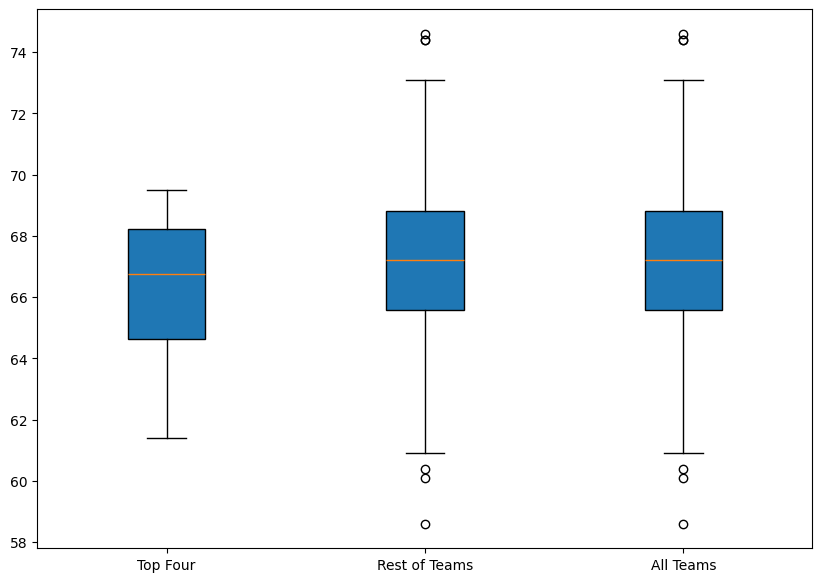

In [128]:


# Boxplot axes for ADJ_T
x = top_four["ADJ_T"].to_numpy()
y = rest["ADJ_T"].to_numpy()
z = df_2025["ADJ_T"].to_numpy()
d = [x, y, z]

fig = plt.figure(figsize =(10, 7))
plt.boxplot(d, vert = True, patch_artist = True, labels = ['Top Four', 'Rest of Teams', 'All Teams'])
plt.show()


Our initial comparison of the Top Four teams revealed a negligible difference in average Adjusted Tempo {ADJ_T} compared to the rest of the field, suggesting that pace of play alone was not the distinguishing factor for the tournament's most dominant group.To find a clearer statistical signature, we expanded the scope of the elite group to include the Top Eight teams, Top Sixteen and Top Thirty-Two in the 2025 dataset. This expanded analysis seeks to determine if a collective, consistent approach to tempo emerges when a larger pool of elite teams is considered, or if high-level success is instead achieved through diverse strategies.

C:\Users\jn080328\AppData\Local\Temp\ipykernel_49416\852956715.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(d, vert = True, patch_artist = True, labels = ['Top Four', "Top Eight", "Top Sixteen", "Top Thrirty-Two" ,'Rest of Teams', 'All Teams'])


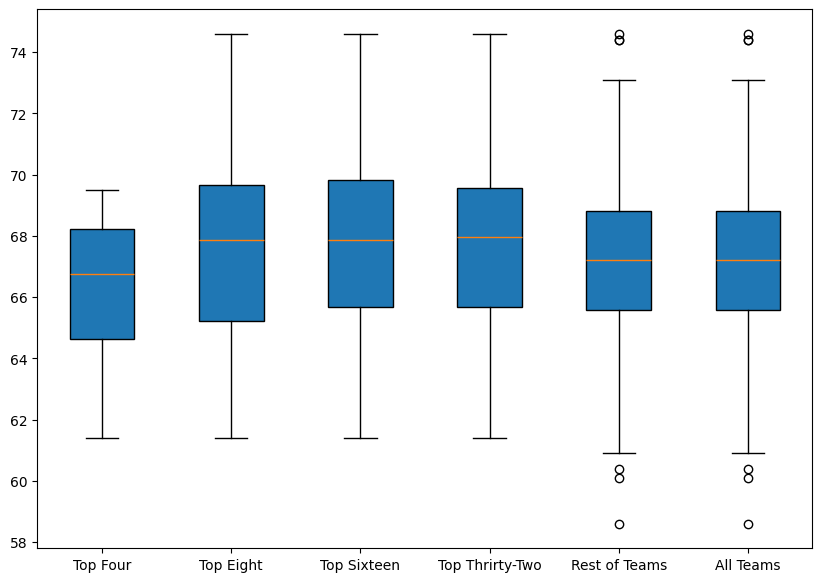

In [129]:
# As the data set is not sorted by seed, yet has index 0-3 as the first seeds, the values of 0 need to be turned into a place holder value that is larger than 32.
df_2025['SEED'] = df_2025['SEED'].replace(0, 100)

# grabbing the top 8 teams for ADJ_T analysis
top_eight = df_2025.sort_values(by=["SEED"], ascending=True).head(8).copy()
top_sixteen = df_2025.sort_values(by=["SEED"], ascending=True).head(16).copy()
top_thirtytwo = df_2025.sort_values(by=["SEED"], ascending=True).head(32).copy()


# Boxplot axes for ADJ_T with the top 8 teams included
x = top_four["ADJ_T"].to_numpy()
y = rest["ADJ_T"].to_numpy()
z = df_2025["ADJ_T"].to_numpy()
a = top_eight["ADJ_T"].to_numpy()
b = top_sixteen["ADJ_T"].to_numpy()
c = top_thirtytwo["ADJ_T"].to_numpy()
d = [x, a, b, c, y, z]

fig = plt.figure(figsize =(10, 7))
plt.boxplot(d, vert = True, patch_artist = True, labels = ['Top Four', "Top Eight", "Top Sixteen", "Top Thrirty-Two" ,'Rest of Teams', 'All Teams'])
plt.show()


In [130]:
top_thirtytwo

,RK,Team,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,FTRD,2P_O,2P_D,3P_O,3P_D,3PR,3PRD,ADJ_T,WAB,SEED
0,1,Houston,B12,34,30,124.8,88.0,0.9823,52.7,44.9,...,34.1,49.0,43.9,39.8,30.9,34.5,43.1,61.4,11.6,1
1,2,Duke,ACC,34,31,128.5,91.3,0.9807,57.4,44.5,...,25.4,58.0,43.4,37.7,30.9,45.4,37.9,65.7,9.6,1
2,3,Auburn,SEC,33,28,129.0,93.7,0.9756,55.7,46.0,...,39.2,56.1,47.2,36.8,29.2,40.6,34.8,67.8,12.5,1
3,4,Florida,SEC,34,30,127.7,94.0,0.9713,55.0,45.3,...,33.0,56.4,45.9,35.5,29.6,43.6,37.3,69.5,11.1,1
4,5,Alabama,SEC,33,25,127.6,96.4,0.9621,56.3,47.9,...,33.9,59.7,48.8,35.0,30.8,46.2,35.1,74.6,9.8,2
5,6,Tennessee,SEC,34,27,119.3,91.1,0.9570,52.8,44.4,...,29.4,54.1,46.7,34.0,27.8,43.0,45.1,63.8,9.3,2
14,15,St. John's,BE,34,30,112.6,89.1,0.9364,49.7,46.6,...,30.4,51.5,45.8,30.4,31.8,30.3,40.8,70.1,7.8,2
12,13,Michigan St.,B10,33,27,116.8,91.8,0.9410,51.2,46.1,...,33.1,53.6,49.1,30.8,27.9,32.7,41.4,67.9,7.8,2
11,12,Wisconsin,B10,35,26,122.4,96.1,0.9418,53.6,47.9,...,28.1,54.7,46.8,34.9,33.0,48.1,39.1,67.5,5.9,3
16,17,Kentucky,SEC,33,22,123.9,98.7,0.9315,56.0,50.4,...,31.0,55.9,53.7,37.4,30.8,41.7,43.5,70.9,5.6,3


# Is having a #1 Seed in the Final Four common?
The 2025 NCAA Tournament will be etched into history for its unprecedented conclusion, featuring a Final Four round composed entirely of #1 seeds. While a #1 seed's presence in the tournament's final weekend is expected, four simultaneously advancing defies historical probability, raising questions about the unique dominance of that year's field. This analysis aims to contextualize the 2025 outcome by quantifying the historical frequency of such success. By reviewing the complete dataset of tournament results, we will establish the standard rate of #1 seeds appearing in the Final Four and the Elite Eight, providing a solid statistical baseline against which the remarkable 2025 season can be accurately measured.

In [131]:
# Creating a new dataframe that only includes teams that made it to the Final Four, Runner-Up, or Champions. 

df_all_years_final_four = df_all_years[(df_all_years['POSTSEASON'] == 'F4') |  (df_all_years['POSTSEASON'] == '2ND') | (df_all_years['POSTSEASON'] == 'Champions')].copy()

# Data frame that contains all one seeds across all years
df_one_seed = df_all_years[df_all_years['SEED'] == 1]
# Data frame that contains all one seeds that made it to the final four
df_one_seed_final_four = df_one_seed[(df_all_years['POSTSEASON'] == 'F4') |  (df_all_years['POSTSEASON'] == '2ND') | (df_all_years['POSTSEASON'] == 'Champions')].copy()


df_all_years_final_four

C:\Users\jn080328\AppData\Local\Temp\ipykernel_49416\1917916826.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_one_seed_final_four = df_one_seed[(df_all_years['POSTSEASON'] == 'F4') |  (df_all_years['POSTSEASON'] == '2ND') | (df_all_years['POSTSEASON'] == 'Champions')].copy()


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
1,Connecticut,BE,34,31,127.1,93.6,0.9712,57.1,45.1,14.9,...,32.5,58.5,43.7,36.7,31.9,64.6,11.3,Champions,1,2024
2,Purdue,B10,33,29,126.2,94.7,0.9644,56.0,47.7,16.5,...,23.0,53.2,48.1,40.8,31.4,67.6,11.0,2ND,1,2024
14,Alabama,SEC,32,21,125.2,102.1,0.9126,56.3,49.9,16.0,...,39.6,57.6,51.1,36.5,31.9,72.5,3.4,F4,4,2024
44,North Carolina St.,ACC,36,22,114.0,101.2,0.7981,50.7,50.5,13.7,...,31.9,50.1,49.5,34.6,34.9,67.9,-0.6,F4,11,2024
374,Connecticut,BE,39,31,121.5,91.2,0.9643,53.9,44.4,18.9,...,37.8,53.6,44.4,36.3,29.7,66.7,5.0,Champions,4,2023
378,San Diego St.,MWC,38,32,110.8,89.5,0.9205,49.3,46.5,17.3,...,30.2,48.4,49.3,34.0,28.3,65.7,5.7,2ND,5,2023
379,Miami FL,ACC,37,29,119.1,100.9,0.8715,54.3,51.2,16.1,...,24.0,53.8,51.8,36.8,33.5,68.6,3.7,F4,5,2023
394,Florida Atlantic,CUSA,37,35,114.0,95.8,0.8815,54.3,46.1,16.9,...,26.3,53.8,44.7,36.6,32.4,67.5,4.7,F4,9,2023
726,Kansas,B12,40,34,119.8,91.3,0.9580,53.8,45.8,17.3,...,27.7,53.6,46.4,36.1,29.8,69.1,10.4,Champions,1,2022
729,Duke,ACC,39,32,122.7,96.0,0.9440,55.6,47.1,15.0,...,19.1,56.0,46.6,36.6,32.0,67.4,7.2,F4,2,2022


In [132]:
df_one_seed_final_four

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
1,Connecticut,BE,34,31,127.1,93.6,0.9712,57.1,45.1,14.9,...,32.5,58.5,43.7,36.7,31.9,64.6,11.3,Champions,1,2024
2,Purdue,B10,33,29,126.2,94.7,0.9644,56.0,47.7,16.5,...,23.0,53.2,48.1,40.8,31.4,67.6,11.0,2ND,1,2024
726,Kansas,B12,40,34,119.8,91.3,0.9580,53.8,45.8,17.3,...,27.7,53.6,46.4,36.1,29.8,69.1,10.4,Champions,1,2022
1084,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,31.7,54.1,48.1,41.8,34.0,68.8,6.6,Champions,1,2021
1086,Gonzaga,WCC,26,26,125.4,89.8,0.9791,61.0,47.5,16.1,...,25.9,64.0,46.8,36.5,32.5,74.6,8.5,2ND,1,2021
1431,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1,2019
1784,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1,2018
1789,Kansas,B12,39,31,122.1,96.4,0.9385,57.5,49.1,16.6,...,24.6,55.6,48.6,40.1,33.3,69.9,8.2,F4,1,2018
2134,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1,2017
2135,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1,2017


In [133]:
df_one_seed_final_four['TEAM'].count()

np.int64(16)

In [134]:
df_one_seed['TEAM'].count()

np.int64(44)

In [135]:
print(  f"For all the one seeds there have been in the tournament since 2013({df_one_seed["TEAM"].count()}), only {df_one_seed_final_four['TEAM'].count()} have made it to the final four. \nThis makes it a {(df_one_seed_final_four['TEAM'].count() / df_one_seed['TEAM'].count())*100}% chance that a #1 seed will make it amongst the last four teams.")

For all the one seeds there have been in the tournament since 2013(44), only 16 have made it to the final four. 
This makes it a 36.36363636363637% chance that a #1 seed will make it amongst the last four teams.


Wow, so with a 36% percent chance that a #1 seed will make it to the final four, what are the chances that all four are #1 seeds? To show how rare it was that all four spots were #1 seeds, we must calculate the compound probability of four independent events occurring simultaneously.

In [136]:
compounded__probability = (((df_one_seed_final_four['TEAM'].count() / df_one_seed['TEAM'].count()))**4)*100
print(compounded__probability)

1.7485144457345811


The analyssis reveals that the chance of all four #1 seeds simultaneously reaching the Final Four is incredibly rare. It is expected to happen 1.76% out of every 100 tournaments! That is roughly once every 57 years. This figure strongly contextualizes the $2025$ season as a massive historical anomaly.

# What is the most common position for different seeds to end the season at?

This is a core question for understanding the predictive power and volatility of the NCAA Tournament. This analysis seeks to determine the typical endpoint for teams across all seeding levels. By cross-referencing a team's pre-tournament seed ($\mathbf{SEED}$) with their final result ($\mathbf{POSTSEASON}$) across all historical years, we can construct a statistical profile for each seed. This will reveal the most common fate for a $1$-seed (e.g., Sweet Sixteen), a $5$-seed (e.g., Round of 32), and a $12$-seed (e.g., Round of 64), providing a comprehensive view of the tournament's true probability landscape.

In [137]:
# Creating a new datafram that defines each seed, their post season end and the count of each combination.
df_seeds_postseason = df_all_years.groupby(['SEED', 'POSTSEASON']).size().reset_index(name='COUNT')
print(df_seeds_postseason)

    SEED POSTSEASON  COUNT
0      0   No Tourn   3137
1      1        2ND      5
2      1  Champions      8
3      1         E8      8
4      1         F4      3
..   ...        ...    ...
75    15        R64     39
76    15        S16      3
77    16        R32      2
78    16        R64     42
79    16        R68     22

[80 rows x 3 columns]


In [138]:
# The "group_by" function above is useful, but the POSTSEASON values need to be modified to include a numerical value that represents how far a team made it in the tournament. The code below replaces the POSTSEASON values with a numerical value followed by the original POSTSEASON value.

df_all_years_modified_seeds = df_all_years.copy()

df_all_years_modified_seeds['POSTSEASON'] = df_all_years_modified_seeds['POSTSEASON'].replace('100 No Tourn', 'No Tourn')
df_all_years_modified_seeds['POSTSEASON'] = df_all_years_modified_seeds['POSTSEASON'].replace('Champions', '1 Champions')
df_all_years_modified_seeds['POSTSEASON'] = df_all_years_modified_seeds['POSTSEASON'].replace('2ND', '2 2ND')
df_all_years_modified_seeds['POSTSEASON'] = df_all_years_modified_seeds['POSTSEASON'].replace('F4', '3 F4')
df_all_years_modified_seeds['POSTSEASON'] = df_all_years_modified_seeds['POSTSEASON'].replace('E8', '4 E8')
df_all_years_modified_seeds['POSTSEASON'] = df_all_years_modified_seeds['POSTSEASON'].replace('S16', '5 S16')
df_all_years_modified_seeds['POSTSEASON'] = df_all_years_modified_seeds['POSTSEASON'].replace('R32', '6 R32')
df_all_years_modified_seeds['POSTSEASON'] = df_all_years_modified_seeds['POSTSEASON'].replace('R64', '7 R64')
df_all_years_modified_seeds['POSTSEASON'] = df_all_years_modified_seeds['POSTSEASON'].replace('R68', '8 R68')

df_all_years_modified_seeds

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,Houston,B12,34,30,119.2,85.5,0.9785,49.7,44.0,13.7,...,39.0,48.4,43.4,34.7,30.0,63.3,10.6,5 S16,1,2024
1,Connecticut,BE,34,31,127.1,93.6,0.9712,57.1,45.1,14.9,...,32.5,58.5,43.7,36.7,31.9,64.6,11.3,1 Champions,1,2024
2,Purdue,B10,33,29,126.2,94.7,0.9644,56.0,47.7,16.5,...,23.0,53.2,48.1,40.8,31.4,67.6,11.0,2 2ND,1,2024
3,North Carolina,ACC,34,27,116.8,93.2,0.9305,51.3,46.4,14.4,...,28.3,50.3,46.0,35.4,31.4,70.4,6.6,5 S16,1,2024
4,Iowa St.,B12,34,27,113.6,86.5,0.9583,51.9,47.1,15.7,...,35.2,51.7,46.9,34.9,31.5,67.6,6.9,5 S16,2,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,5 S16,3,2013
3881,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,5 S16,6,2013
3882,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,5 S16,12,2013
3883,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,5 S16,13,2013


In [139]:
# Creating a new dataframe that defines each seed, their post season end and the count of each combination.
df_all_years_modified_seeds_sorted = df_all_years_modified_seeds.groupby(['SEED', 'POSTSEASON']).size().reset_index(name='COUNT')

# Converting the new dataframe into a pivot table in order to change the data from long format to wide format.
df_all_years_modified_seeds_sorted.pivot(index='SEED', columns='POSTSEASON', values='COUNT')


POSTSEASON,1 Champions,2 2ND,3 F4,4 E8,5 S16,6 R32,7 R64,8 R68,No Tourn
SEED,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3137.0
1,8.0,5.0,3.0,8.0,10.0,8.0,2.0,NaN,NaN
2,1.0,NaN,6.0,10.0,10.0,12.0,5.0,NaN,NaN
3,NaN,2.0,1.0,9.0,14.0,12.0,7.0,NaN,NaN
4,1.0,1.0,2.0,5.0,15.0,10.0,9.0,NaN,NaN
5,NaN,1.0,2.0,1.0,11.0,12.0,17.0,NaN,NaN
6,NaN,NaN,NaN,4.0,3.0,14.0,23.0,NaN,NaN
7,1.0,NaN,2.0,NaN,7.0,19.0,15.0,NaN,NaN
8,NaN,2.0,NaN,NaN,4.0,15.0,23.0,NaN,NaN


In [140]:
# 1. Find the index of the row with the maximum 'Count' for each 'SEED' group.
# 'idxmax()' returns the index label of the row with the largest value in the 'Count' column for each group.
most_common_index = df_all_years_modified_seeds_sorted.groupby('SEED')['COUNT'].idxmax()

# 2. Use the index labels to select the actual rows from the table.
# This results in a table where each SEED appears only once, alongside its most common outcome and count.
df_most_common = df_all_years_modified_seeds_sorted.loc[most_common_index]

# Clean up the final table for presentation (optional)
df_most_common = df_most_common.sort_values(by='SEED').reset_index(drop=True)

print("The Most Common Postseason Outcome for Each Seed:")
print(df_most_common.to_string(index=False))

The Most Common Postseason Outcome for Each Seed:
 SEED POSTSEASON  COUNT
    0   No Tourn   3137
    1      5 S16     10
    2      6 R32     12
    3      5 S16     14
    4      5 S16     15
    5      7 R64     17
    6      7 R64     23
    7      6 R32     19
    8      7 R64     23
    9      7 R64     20
   10      7 R64     29
   11      7 R64     22
   12      7 R64     27
   13      7 R64     35
   14      7 R64     37
   15      7 R64     39
   16      7 R64     42


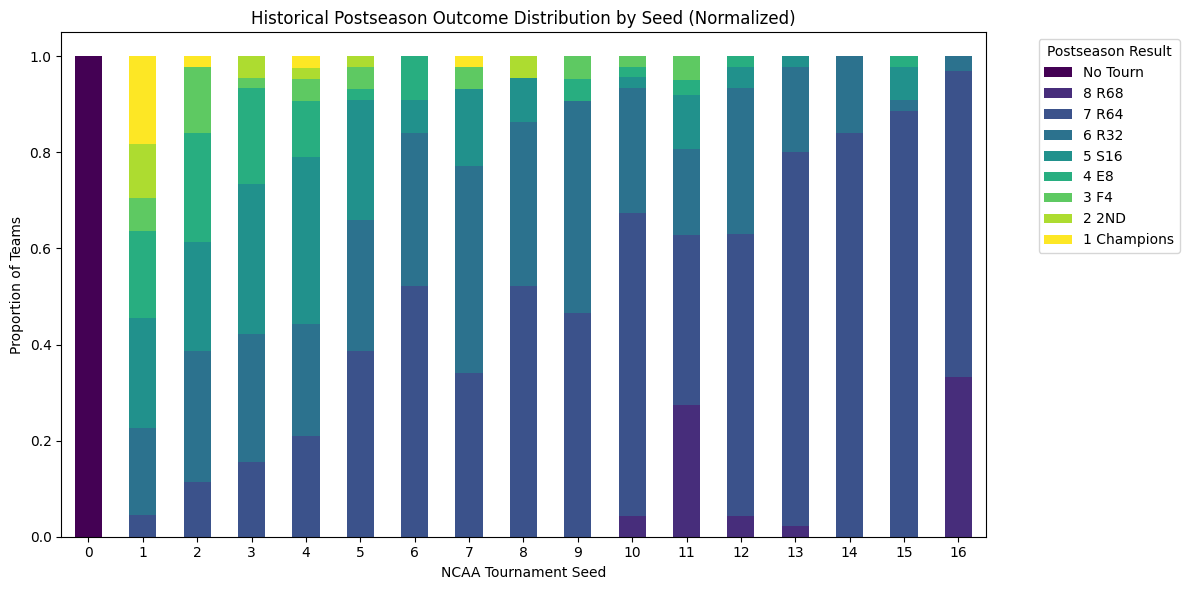

In [141]:
# --- 1. Preparation: Pivot the data ---
# SEED becomes the index, POSTSEASON outcomes become the columns
pivot_df = df_all_years_modified_seeds_sorted.pivot(index='SEED', columns='POSTSEASON', values='COUNT').fillna(0)

# --- 2. Preparation: Normalize the data (Calculate percentages) ---
# Divide each count by the sum of its row (total teams for that seed)
pivot_df_normalized = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# --- 3. Plotting the Normalized Stacked Bars ---

# Ensure logical order of columns for the stack (from earliest exit to latest)
ordered_columns = ['No Tourn','8 R68' ,'7 R64', '6 R32', '5 S16', '4 E8', '3 F4', '2 2ND', '1 Champions']
existing_columns = [col for col in ordered_columns if col in pivot_df_normalized.columns]
pivot_df_normalized = pivot_df_normalized[existing_columns]

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked bar chart
pivot_df_normalized.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')

# Add labels and title
ax.set_title('Historical Postseason Outcome Distribution by Seed (Normalized)')
ax.set_xlabel('NCAA Tournament Seed')
ax.set_ylabel('Proportion of Teams')
ax.legend(title='Postseason Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()



The analysis successfully identified the historical endpoint that defines success or failure for every seed in the NCAA Tournament. The results reveal a clear statistical expectation across three tiers of competition: the elite seeds ($\mathbf{1}$ through $\mathbf{4}$) are most likely to reach the Sweet Sixteen ($\text{S}16$), signifying that failure to reach the second weekend is historically improbable for this group. The mid-tier seeds ($\mathbf{5}$ through $\mathbf{8}$) most commonly conclude their run in the Round of 32 ($\text{R}32$), confirming that winning one game is their statistical norm. Finally, the lower seeds ($\mathbf{9}$ through $\mathbf{16}$) overwhelmingly share the most common result of the Round of 64 ($\text{R}64$), demonstrating that a first-round exit is the expected outcome for the bottom half of the bracket.

# Final Thoughts

The comprehensive analysis of historical tournament data affirms that metrics like Adjusted Offensive and Defensive Efficiency ($\text{ADJOE}/\text{ADJDE}$) are powerful tools that accurately define the statistical hierarchy of collegiate basketball. Our findings clearly establish the $\text{Sweet Sixteen}$ as the historical norm for $\mathbf{\#1}$ seeds, while $\text{R}32$ and $\text{R}64$ are the expected endpoints for $\mathbf{5}$-seeds and $\mathbf{12}$-seeds, respectively. However, the calculation of a $1.76\%$ compound probability for all four $\mathbf{\#1}$ seeds to simultaneously reach the Final Four reveals the monumental difficulty of achieving statistical perfection in a single-elimination tournament. Ultimately, the data supports the conclusion that while advanced metrics effectively quantify a team's potential and establish the statistical null hypothesis for every seed, they are perpetually subject to the immense, chaotic variance of March Madness. The 2025 season serves as a dramatic historical outlier, a powerful reminder that statistical probability defines the expected path, but the unique intensity and randomness of the tournament will always generate results that defy the most robust models.

If you have made it this far, thank you for reading! This is one of many personal projects that I would like to create. I find data to be so interesting and the fact that you can draw visual conclusions through graphs has always fascinated me.